<a href="https://colab.research.google.com/github/anton03013/Data-AI/blob/main/BTL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data


Import library


In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/anton03013/Segmention-Data/main/Mall_Customers.csv")

print(df)
print(df.describe())
print(df.dtypes)
df['New Customer ID'] = range(1, len(df) + 1)
last_customer_id = df['New Customer ID'].iloc[-1]
print("Tổng:",last_customer_id)
gender_counts = df['Gender'].value_counts()
print(gender_counts)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000

Age Histogram


Text(0, 0.5, 'Frequency')

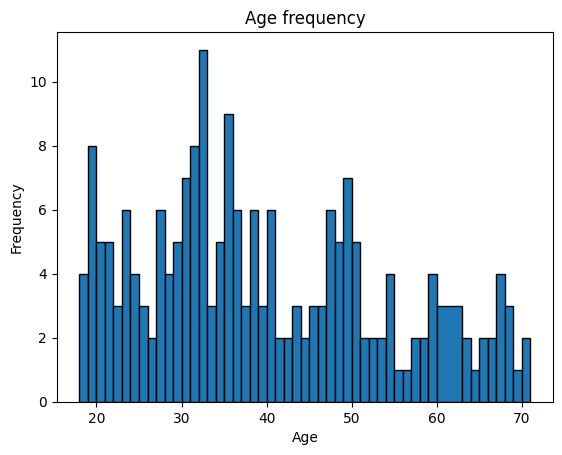

In [ ]:
age_counts = df['Age'].value_counts()
bin_edges = age_counts.index.sort_values().tolist()
bin_edges.append(bin_edges[-1] + 1)

plt.hist(df['Age'], bins=bin_edges, edgecolor='black')
plt.title('Age frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')

Gender pie

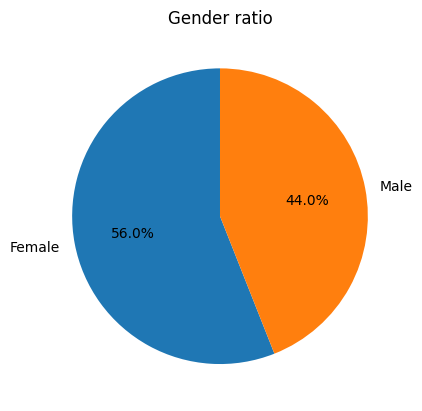

In [ ]:
plt.show()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender ratio')
plt.show()

Annual Income Frequency

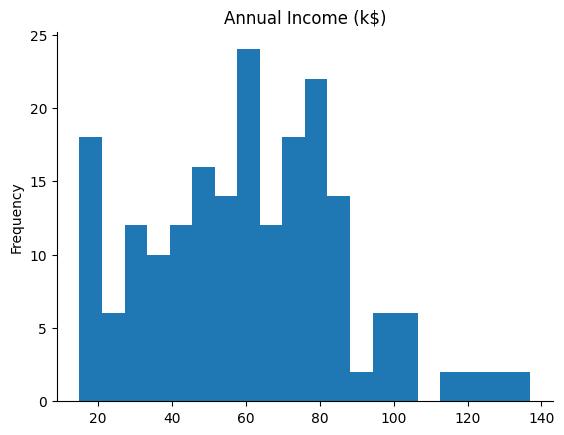

In [ ]:
df['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

Spending Ability Frequency

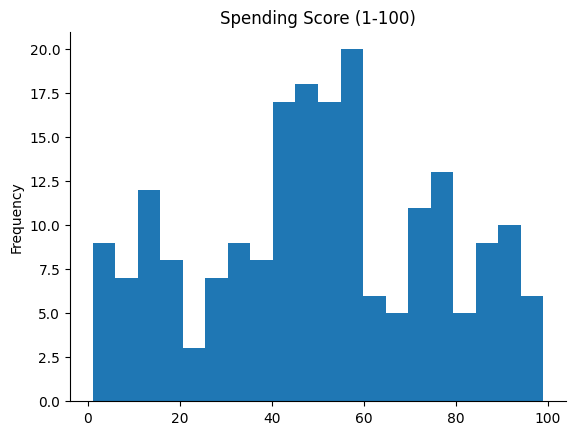

In [ ]:
df['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

Spending Abbility

In [ ]:
List = df['Spending Score (1-100)']
List
Spending_Ability = []

for k in List:
    if k>80:
        Spending_Ability.append('Very High')
    elif k>60:
        Spending_Ability.append('High')
    elif k>30:
        Spending_Ability.append('Medium')
    else:
        Spending_Ability.append('Low')

df['Spending_Ability'] = Spending_Ability

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),New Customer ID,Spending_Ability
0,1,Male,19,15,39,1,Medium
1,2,Male,21,15,81,2,Very High
2,3,Female,20,16,6,3,Low
3,4,Female,23,16,77,4,High
4,5,Female,31,17,40,5,Medium


Spending Ability Pie

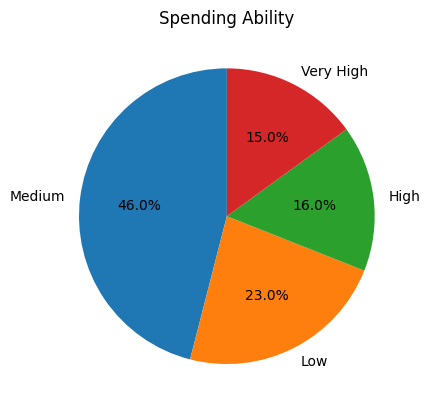

In [ ]:
spending_counts = df['Spending_Ability'].value_counts()
plt.pie(spending_counts, labels=spending_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Spending Ability')
plt.show()

#Feature Selection

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

data = df[['Spending Score (1-100)', 'Annual Income (k$)']]

spending_score_array = data['Spending Score (1-100)'].to_numpy()
age_array = data['Annual Income (k$)'].to_numpy()

X = np.column_stack((spending_score_array, age_array))
print(X)

[[ 39  15]
 [ 81  15]
 [  6  16]
 [ 77  16]
 [ 40  17]
 [ 76  17]
 [  6  18]
 [ 94  18]
 [  3  19]
 [ 72  19]
 [ 14  19]
 [ 99  19]
 [ 15  20]
 [ 77  20]
 [ 13  20]
 [ 79  20]
 [ 35  21]
 [ 66  21]
 [ 29  23]
 [ 98  23]
 [ 35  24]
 [ 73  24]
 [  5  25]
 [ 73  25]
 [ 14  28]
 [ 82  28]
 [ 32  28]
 [ 61  28]
 [ 31  29]
 [ 87  29]
 [  4  30]
 [ 73  30]
 [  4  33]
 [ 92  33]
 [ 14  33]
 [ 81  33]
 [ 17  34]
 [ 73  34]
 [ 26  37]
 [ 75  37]
 [ 35  38]
 [ 92  38]
 [ 36  39]
 [ 61  39]
 [ 28  39]
 [ 65  39]
 [ 55  40]
 [ 47  40]
 [ 42  40]
 [ 42  40]
 [ 52  42]
 [ 60  42]
 [ 54  43]
 [ 60  43]
 [ 45  43]
 [ 41  43]
 [ 50  44]
 [ 46  44]
 [ 51  46]
 [ 46  46]
 [ 56  46]
 [ 55  46]
 [ 52  47]
 [ 59  47]
 [ 51  48]
 [ 59  48]
 [ 50  48]
 [ 48  48]
 [ 59  48]
 [ 47  48]
 [ 55  49]
 [ 42  49]
 [ 49  50]
 [ 56  50]
 [ 47  54]
 [ 54  54]
 [ 53  54]
 [ 48  54]
 [ 52  54]
 [ 42  54]
 [ 51  54]
 [ 55  54]
 [ 41  54]
 [ 44  54]
 [ 57  54]
 [ 46  54]
 [ 58  57]
 [ 55  57]
 [ 60  58]
 [ 46  58]
 [ 55  59]

Lựa chọn số cụm phù hợp với Elbow method và huấn luyện mô hình

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex


Vòng lặp từ 1 đến 10: for i in range(1, 11): để thử nghiệm các giá trị k từ 1 đến 10.
Khởi tạo KMeans: kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0) với số cụm là i, phương pháp khởi tạo là ‘k-means++’ và random_state=0 để đảm bảo kết quả có thể tái lập.
Huấn luyện mô hình: kmeans.fit(X) với dữ liệu X.
Lưu trữ WCSS: wcss.append(kmeans.inertia_) để thêm giá trị WCSS của mô hình vào danh sách.
Phương pháp này giúp bạn xác định số lượng cụm tối ưu bằng cách phân tích sự thay đổi của WCSS khi tăng số lượng cụm. Vẽ biểu đồ Elbow để tìm điểm “khuỷu tay”, nơi mà WCSS giảm đáng kể, từ đó chọn số lượng cụm phù hợp.

#Visual

Elbow

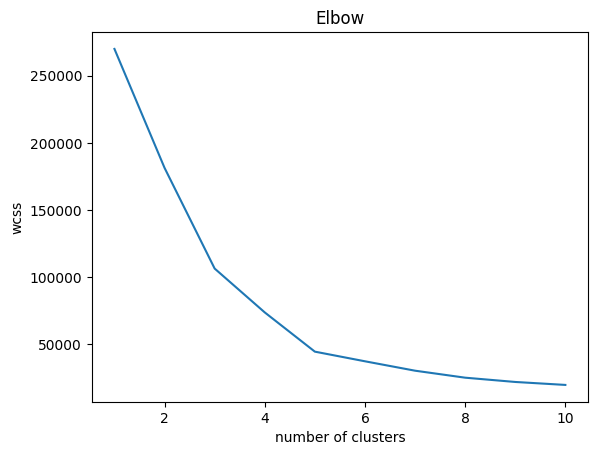

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('Elbow')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

Số lượng cụm (k) tối ưu có thể được xác định tại điểm “khuỷu tay” của biểu đồ. Trong trường hợp này, điểm khuỷu tay xuất hiện tại k = 5. Điều này có nghĩa là sau khi tăng số lượng cụm lên 5, sự giảm của WCSS không còn đáng kể nữa. Vì vậy, k = 5 có thể được coi là số lượng cụm tối ưu cho mô hình KMeans.

Model Training

In [ ]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Kmeans

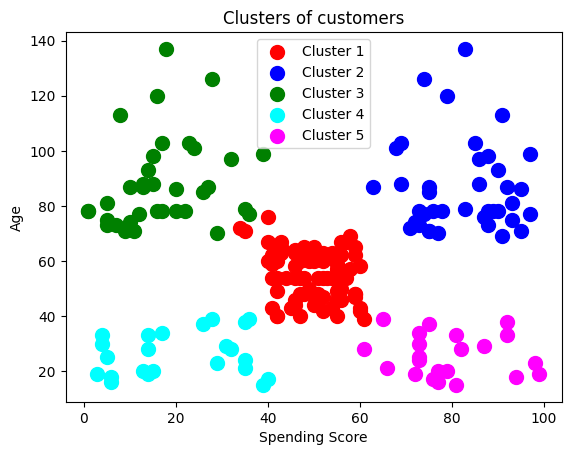

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.ylabel('Age')
plt.xlabel('Spending Score')
plt.legend()
plt.show()

Agglomerative Clustering

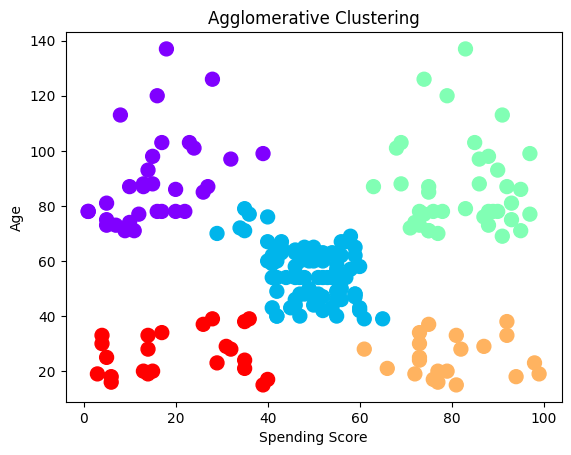

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=5).fit(X)

plt.scatter(spending_score_array, age_array, c=clustering.labels_,s = 100, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.show()

MeanShift

Tính toán bandwidth dựa trên dữ liệu


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)

clustering = MeanShift(bandwidth=bandwidth).fit(X)

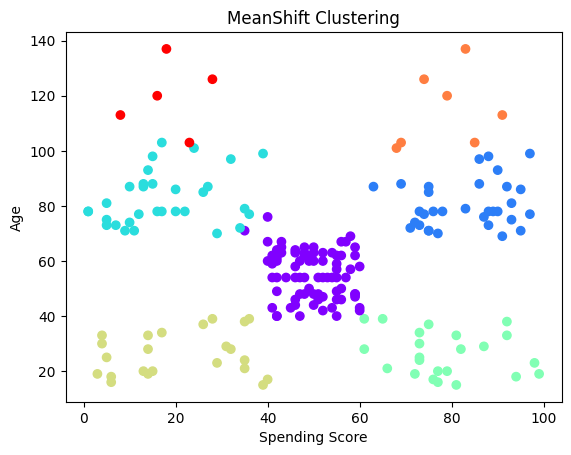

In [ ]:
plt.scatter(spending_score_array, age_array, c=clustering.labels_, cmap='rainbow')
plt.title('MeanShift Clustering')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.show()

#Metrics

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X, kmeans.labels_)

agg_silhouette = silhouette_score(X, clustering.labels_)

X_meanshift = X[clustering.labels_ != -1]
meanshift_labels = clustering.labels_[clustering.labels_ != -1]
meanshift_silhouette = silhouette_score(X_meanshift, meanshift_labels)

print("Silhouette Score (KMeans):", kmeans_silhouette)
print("Silhouette Score (Agglomerative Clustering):", agg_silhouette)
print("Silhouette Score (MeanShift):", meanshift_silhouette)

Silhouette Score (KMeans): 0.44760979994374317
Silhouette Score (Agglomerative Clustering): 0.5293866120280639
Silhouette Score (MeanShift): 0.5293866120280639


In [ ]:
#Silhouette Score: Đo lường mức độ tách biệt giữa các cụm
#Giá trị càng gần 1 càng tốt, cho thấy các cụm được phân tách rõ ràng